# Etape 4.3 : Dashboard executif

**Livrables** :
- Ce notebook `11_dashboard_executif.ipynb`
- Figure dashboard `output/11_figures/dashboard_energie.png`

---
---

## Import

In [1]:
import sys
import os
from pathlib import Path
import psutil
import time
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

## (optionnel) Enregistrement de la date de la dernière execution de ce notebook

In [2]:
print(f"- Date de la dernière execution de ce notebook : {datetime.now().strftime('%d/%m/%Y %H:%M:%S')} (FR)")

- Date de la dernière execution de ce notebook : 20/02/2026 20:33:47 (FR)


---

## (Optionnel) Mesure du temps de traitement global pour ce script - enregistrement de l'heure de début + estimation instantanée des ressources machine libres

In [3]:
## Heure de début
start_time_11 = time.time()

## Machine: current available RAM (in GB)
ram_available_11 = psutil.virtual_memory().available / (1024**3)

## Machine: current available CPU
logical = psutil.cpu_count()
physical = psutil.cpu_count(logical=False) or logical

cpu_used = psutil.cpu_percent(interval=2)
cpu_available_pct_11 = 100 - cpu_used

available_logical_11 = logical * cpu_available_pct_11 / 100
available_physical_11 = physical * cpu_available_pct_11 / 100

## Show available resources
print(f"- Current machine RAM available : {ram_available_11:.2f} GB")
print(f"- Current machine CPU available : {cpu_available_pct_11:.2f}%")
print(f"    Approx logical cores free  : {available_logical_11:.1f}")
print(f"    Approx physical cores free : {available_physical_11:.1f}")

- Current machine RAM available : 10.60 GB
- Current machine CPU available : 87.70%
    Approx logical cores free  : 14.0
    Approx physical cores free : 7.0


---

## Chemins des données

In [4]:
# ==============================================================================================================
#                                                   OUTPUTS
# ==============================================================================================================
OUT_DIR = (Path.cwd() / ".." / "output").resolve()
OUT_FIG_DIR = os.path.join(OUT_DIR, "11_figures")
os.makedirs(OUT_FIG_DIR, exist_ok=True)

# ==============================================================================================================
#                                                   INPUTS
# ==============================================================================================================
IN_DIR = (Path.cwd() / ".." / "data").resolve()
IN_CONSO_ENRICHIE_CSV =  os.path.join(OUT_DIR, "05_consommations_enrichies.csv")

# ==============================================================================================================
#                                                    OTHERS
# ==============================================================================================================
TMP_DIR = (Path.cwd() / ".." / "my_tmp").resolve()
TMP_FILE_CSV = TMP_DIR / "tmp_11_resources.txt" # Enregistrer les metrics pour ce script

---

## Chargement des données

In [5]:
df_conso = pd.read_csv(IN_CONSO_ENRICHIE_CSV)

## Affichage de quelques infos
print("df_conso :")
print(f"    - Shape: {df_conso.shape}")
print(f"    - Colonnes: {df_conso.columns.tolist()}")
print()
# Info sur les types
print("    - Infos sur les types : ")
df_conso.info()
print()
## Appercu des donnees
print("    - Appercu des donnees : ")
df_conso.head()

df_conso :
    - Shape: (991, 31)
    - Colonnes: ['batiment_id', 'heure', 'consommation_moyenne', 'unite', 'date', 'type_energie', 'ts_h', 'nom', 'type', 'commune', 'surface_m2', 'annee_construction', 'classe_energetique', 'nb_occupants_moyen', 'temperature_c', 'humidite_pct', 'rayonnement_solaire_wm2', 'vitesse_vent_kmh', 'precipitation_mm', 'jour', 'mois', 'saison', 'jour_de_semaine', 'date_debut', 'date_fin', 'tarif_unitaire', 'cout_financier', 'conso_par_occupant', 'conso_par_m2', 'IPE', 'ecart_moyenne_categorie']

    - Infos sur les types : 
<class 'pandas.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   batiment_id              991 non-null    str    
 1   heure                    991 non-null    int64  
 2   consommation_moyenne     991 non-null    float64
 3   unite                    991 non-null    str    
 4   date                  

,batiment_id,heure,consommation_moyenne,unite,date,type_energie,ts_h,nom,type,commune,...,saison,jour_de_semaine,date_debut,date_fin,tarif_unitaire,cout_financier,conso_par_occupant,conso_par_m2,IPE,ecart_moyenne_categorie
0,BAT0043,22,280.88,m3,2023-01-01,eau,2023-01-01 22:00:00,Piscine Bordeaux 43,piscine,Bordeaux,...,Hiver,6.0,2023-01-01,2023-12-31,3.50,983.080,1.898,0.123,0.123,-401.254
1,BAT0100,17,4.52,m3,2023-01-01,eau,2023-01-01 17:00:00,Mediatheque Rennes 100,mediatheque,Rennes,...,Hiver,6.0,2023-01-01,2023-12-31,3.50,15.820,0.037,0.005,0.005,-92.701
2,BAT0006,3,5.50,kWh,2023-01-01,gaz,2023-01-01 03:00:00,Mairie Paris 6,mairie,Paris,...,Hiver,6.0,2023-01-01,2023-06-30,0.09,0.495,0.087,0.005,0.005,-43.286
3,BAT0126,10,126.88,kWh,2023-01-01,gaz,2023-01-01 10:00:00,Ecole Le Havre 126,ecole,Le Havre,...,Hiver,6.0,2023-01-01,2023-06-30,0.09,11.419,0.375,0.075,0.075,7.068
4,BAT0035,20,3.97,m3,2023-01-02,eau,2023-01-02 20:00:00,Mairie Toulouse 35,mairie,Toulouse,...,NaN,NaN,2023-01-01,2023-12-31,3.50,13.895,0.046,0.005,0.005,-44.816


---

## preparation

In [6]:
df = df_conso.copy()
df["date"] = pd.to_datetime(df["date"])

# conso par m2 si absent
if "conso_par_m2" not in df.columns:
    df["conso_par_m2"] = df["consommation_moyenne"] / df["surface_m2"]

# -------------------------
# Période : 6 derniers mois (par rapport à la dernière date dispo)
# -------------------------
max_date = df["date"].max()
start_6m = (max_date - pd.DateOffset(months=6)).normalize()
df_6m = df[df["date"] >= start_6m].copy()

# -------------------------
# Pré-calculs utiles
# -------------------------
# Panel 1 : conso totale journalière (toutes énergies)
p1 = df_6m.groupby("date")["consommation_moyenne"].sum().sort_index()

# Panel 2 : top 10 énergivores (ici : conso/m² moyenne)
p2 = (
    df.groupby(["batiment_id", "nom", "type", "commune"], as_index=False)
      .agg(conso_m2_moy=("conso_par_m2", "mean"))
      .sort_values("conso_m2_moy", ascending=False)
      .head(10)
)
p2["label"] = p2["nom"].fillna(p2["batiment_id"]) + " (" + p2["commune"].fillna("?") + ")"

# Panel 3 : répartition des coûts par énergie (6 derniers mois)
p3 = df_6m.groupby("type_energie")["cout_financier"].sum().sort_values(ascending=False)

# Panel 4 : conso moyenne par DPE + écart-type (conso/m²)
order_dpe = ["A","B","C","D","E","F","G"]
p4_mean = df.groupby("classe_energetique")["conso_par_m2"].mean().reindex(order_dpe)
p4_std  = df.groupby("classe_energetique")["conso_par_m2"].std().reindex(order_dpe)

# Panel 5 : "carte de chaleur" par commune (commune x énergie = coût 6 mois)
p5 = (
    df_6m.pivot_table(index="commune", columns="type_energie", values="cout_financier", aggfunc="sum")
         .fillna(0)
)
# garder top communes pour lisibilité
top_communes = p5.sum(axis=1).sort_values(ascending=False).head(15).index
p5 = p5.loc[top_communes]

# Panel 6 : économies potentielles si amélioration DPE (simplifié)
# Référence théorique (kWh/m²) indicative ; adapte selon ton contexte
dpe_ref = {"A":50,"B":90,"C":150,"D":230,"E":330,"F":450,"G":600}
# Objectif : amener tout le monde au mieux à "C" (ou rester tel quel si déjà A/B/C)
target_class = "C"
target_val = dpe_ref[target_class]

# conso/m² réelle moyenne par bâtiment (sur 6 derniers mois pour être cohérent)
bat_6m = (
    df_6m.groupby(["batiment_id","nom","type","commune","classe_energetique","surface_m2"], as_index=False)
         .agg(conso_m2_moy=("conso_par_m2","mean"))
)
bat_6m["cible_m2"] = bat_6m["classe_energetique"].map(lambda c: min(dpe_ref.get(c, target_val), target_val))
# économies potentielles en "conso/m²" (si au-dessus de la cible)
bat_6m["gain_m2"] = (bat_6m["conso_m2_moy"] - bat_6m["cible_m2"]).clip(lower=0)

# convertir en économie potentielle "kWh" sur 6 mois (approx)
bat_6m["gain_potentiel"] = bat_6m["gain_m2"] * bat_6m["surface_m2"]

p6 = (
    bat_6m.groupby("classe_energetique")["gain_potentiel"]
          .sum()
          .reindex(order_dpe)
)

---

## Dashboard 2x3

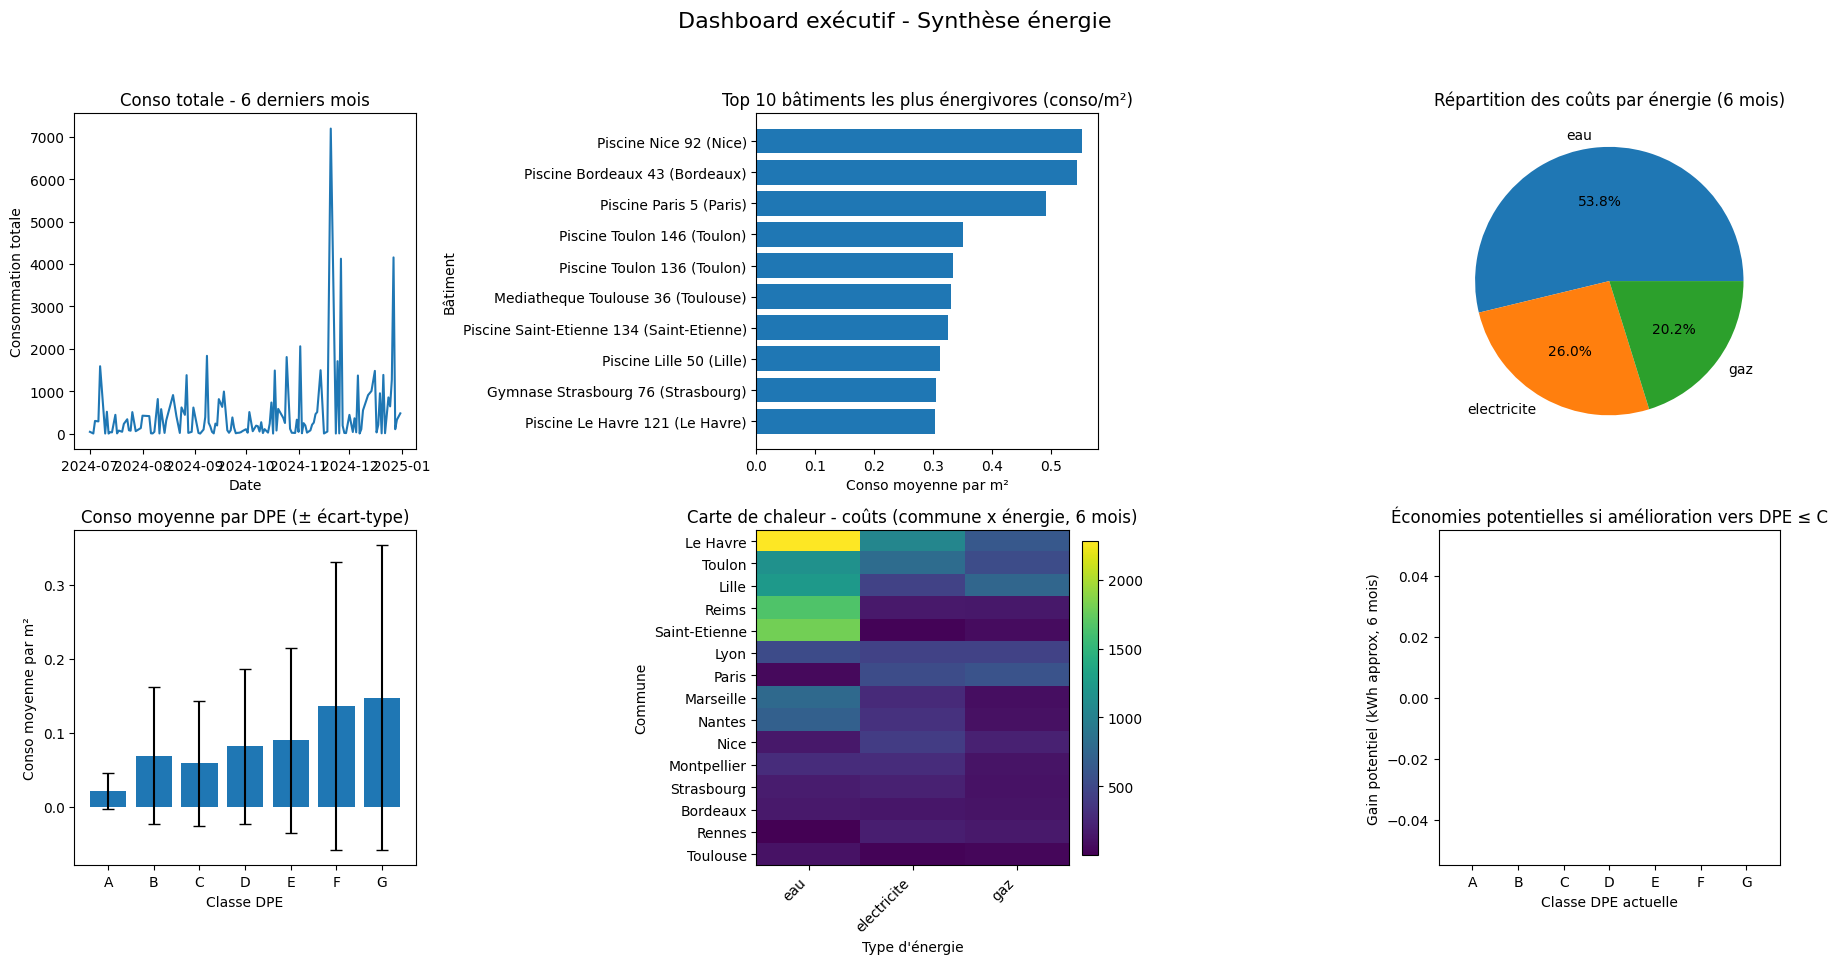

Dashboard exporté : C:\Users\joel\Downloads\ecf_energie\output\11_figures/dashboard_executif_2x3.png


In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Panel 1
ax = axes[0,0]
ax.plot(p1.index, p1.values)
ax.set_title("Conso totale - 6 derniers mois")
ax.set_xlabel("Date")
ax.set_ylabel("Consommation totale")

# Panel 2
ax = axes[0,1]
ax.barh(p2["label"][::-1], p2["conso_m2_moy"][::-1])
ax.set_title("Top 10 bâtiments les plus énergivores (conso/m²)")
ax.set_xlabel("Conso moyenne par m²")
ax.set_ylabel("Bâtiment")

# Panel 3
ax = axes[0,2]
if len(p3) > 0:
    ax.pie(p3.values, labels=p3.index, autopct="%1.1f%%")
ax.set_title("Répartition des coûts par énergie (6 mois)")

# Panel 4
ax = axes[1,0]
x = np.arange(len(order_dpe))
ax.bar(x, p4_mean.values, yerr=p4_std.values, capsize=4)
ax.set_xticks(x)
ax.set_xticklabels(order_dpe)
ax.set_title("Conso moyenne par DPE (± écart-type)")
ax.set_xlabel("Classe DPE")
ax.set_ylabel("Conso moyenne par m²")

# Panel 5
ax = axes[1,1]
im = ax.imshow(p5.values, aspect="auto")
ax.set_title("Carte de chaleur - coûts (commune x énergie, 6 mois)")
ax.set_xlabel("Type d'énergie")
ax.set_ylabel("Commune")
ax.set_xticks(np.arange(len(p5.columns)))
ax.set_xticklabels(p5.columns, rotation=45, ha="right")
ax.set_yticks(np.arange(len(p5.index)))
ax.set_yticklabels(p5.index)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# Panel 6
ax = axes[1,2]
ax.bar(p6.index, p6.values)
ax.set_title(f"Économies potentielles si amélioration vers DPE ≤ {target_class}")
ax.set_xlabel("Classe DPE actuelle")
ax.set_ylabel("Gain potentiel (kWh approx, 6 mois)")

fig.suptitle("Dashboard exécutif - Synthèse énergie", fontsize=16)
fig.tight_layout(rect=[0, 0.02, 1, 0.95])

out_path = f"{OUT_FIG_DIR}/dashboard_executif_2x3.png"
fig.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show(fig)
plt.close(fig)

print(f"Dashboard exporté : {out_path}")

---

## Libérer la mémoire (Optionnel) 

In [8]:
del df_conso
del df

---

## (Optionnel) enregistrement dans un fichier temporaire du temps d'execution + ressources pour utilisation ultérieure (dans le script run_pipeline_hybride.py ou autres)

In [9]:
temps_execution_11 = time.time() - start_time_11
temps_resources = f"""
    Date : {datetime.now().strftime("%d/%m/%Y %H:%M:%S")} (FR)

    temps_exec_sec={temps_execution_11:.2f}
    ram_gb={ram_available_11:.2f}
    cpu_pct={cpu_available_pct_11:.2f}
    logi_cores={available_logical_11:.1f}
    physi_cores={available_physical_11:.1f}
"""

# Ecrire des données du temps d'execution + ressources dans le fichier TMP_FILE_CSV
TMP_FILE_CSV.write_text(temps_resources, encoding="utf-8")

137